In [ ]:
### Check Working directory

import os
print("Working dir: ", os.getcwd())

os.chdir(os.pardir)         # change working dir to parents dir
print("Changed dir: ", os.getcwd())

In [ ]:
import numpy as np
import pandas as pd

# Cosine similarity
def cos_sim(df):

    from sklearn.metrics.pairwise import cosine_similarity
    
    # DataFrame to NumPy array
    data = df.iloc[:, 1:].values        # select factor columns

    # calculation cosine similarity about all items
    cosine_similarity_matrix = cosine_similarity(data)

    # declare a list to save data
    similarity_results = []

    # for loop for cosine similarity
    for i in range((len(cosine_similarity_matrix))):
        for j in range(i + 1, len(cosine_similarity_matrix)):
            similarity_results.append([i +1, j +1, cosine_similarity_matrix[i, j]])


    # save data as pandas DataFrame
    return pd.DataFrame(similarity_results, columns = ["Row1", "Row2", "Cosine Similarity"])

# Euclidean distance
def euclidean_dist(df, col_range):

    from sklearn.metrics.pairwise import euclidean_distances

    col_name = list(df.columns)
    
    euclidean_results = []

    for col_idx in col_range:
        # DataFrame to NumPy array
        data_column = df.iloc[:, col_idx].values.reshape(-1, 1)

        # calculation euclidean distance about all items
        euclidean_dist_matrix = euclidean_distances(data_column)
        
        # for loop for euclidean distance
        for i in range(len(euclidean_dist_matrix)):
            for j in range(i + 1, len(euclidean_dist_matrix)):
                euclidean_results.append([i + 1, j + 1, col_name[col_idx], euclidean_dist_matrix[i, j]])
    
    # save result of distance (i != j)
    return pd.DataFrame(euclidean_results, columns=["Row1", "Row2", "Factor", "Euclidean_Distance"])


# heatmap visualization
def heatmap(df, typeOfFig):

    """
    
    df = raw_data
    typeOfFig   1. Cosine Similarity
                2. Euclidean Distance

    """

    import seaborn as sns
    import matplotlib.pyplot as plt

    if typeOfFig == "cosine":

        from sklearn.metrics.pairwise import cosine_similarity

        data = df.iloc[:, 1:].values
        cosine_sim_matrix = cosine_similarity(data)
        cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df.index, columns=df.index)

        plt.figure(figsize = (10, 8))
        sns.heatmap(cosine_sim_df, cmap='coolwarm', annot=False, cbar=True)
        plt.title('Cosine Similarity Heatmap')
        plt.xlabel('Row Index')
        plt.ylabel('Row Index')
        plt.show()

    
    elif typeOfFig == "euclidean":
        
        from sklearn.metrics.pairwise import euclidean_distances

        col_name = list(df.columns)
        
        euclidean_results = []

        for col_idx in col_range:
            # DataFrame to NumPy array
            data_column = df.iloc[:, col_idx].values.reshape(-1, 1)

            # calculation cosine similarity about all items
            euclidean_dist_matrix = euclidean_distances(data_column)

            plt.figure(figsize = (10, 8))
            sns.heatmap(euclidean_dist_matrix, cmap='coolwarm', annot=False, cbar=True)
            plt.title(f'Euclidean Distance Heatmap (Personality Factor : {df.columns[col_idx]})')
            plt.xlabel('Row Index')
            plt.ylabel('Row Index')
            plt.show()

# Save data as CSV format
def saveToCSV(df, location, file_name):
    df.to_csv(location + '//' + file_name)
    print("{} saved as a CSV file. \nSave Location : ~/{}/{}".format(df, location, file_name))

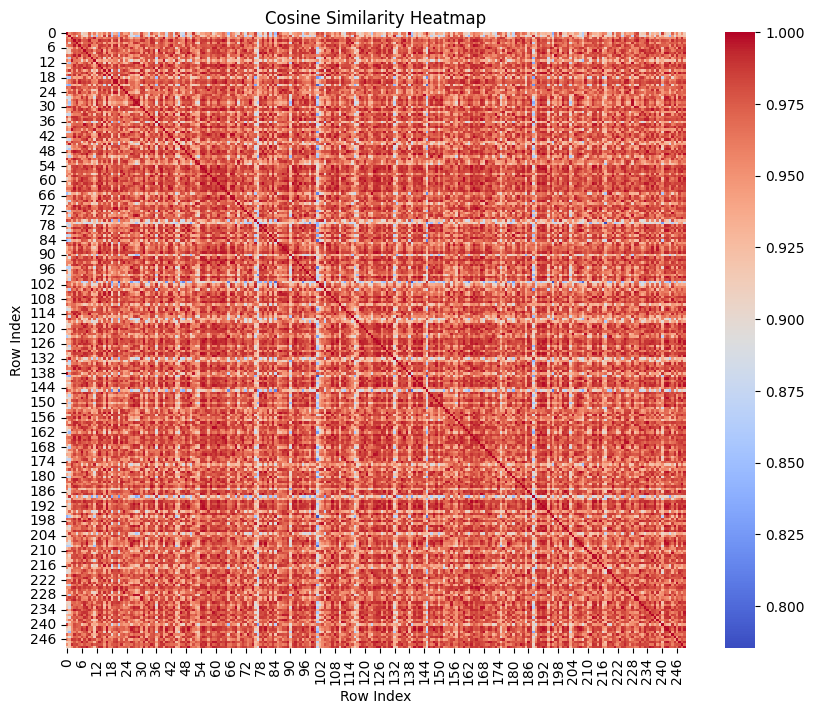

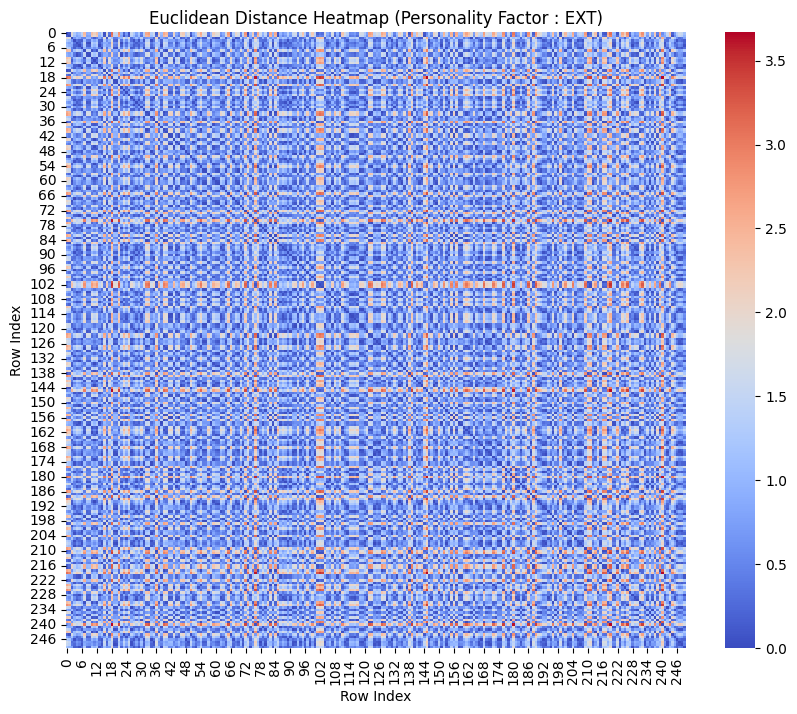

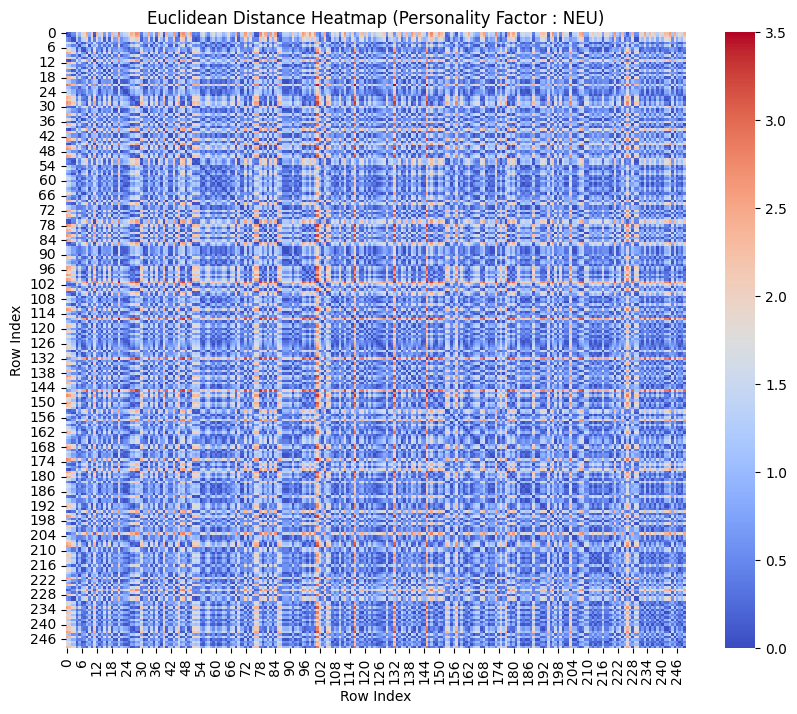

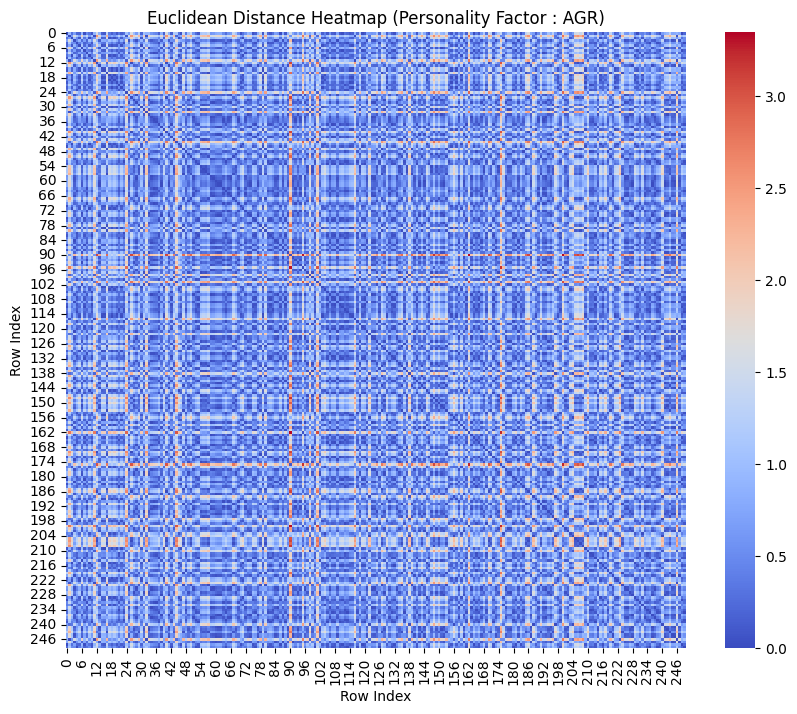

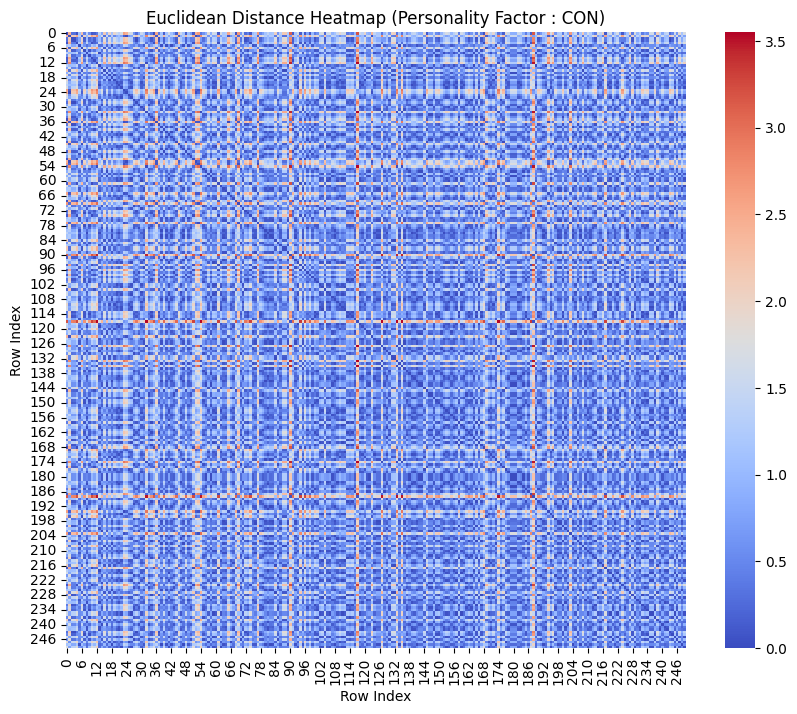

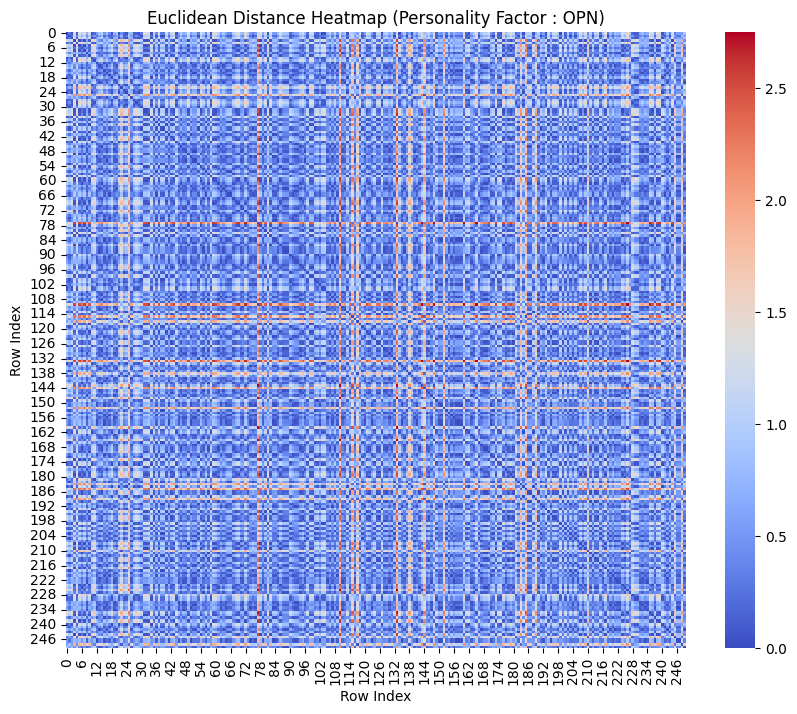

In [12]:
if __name__ == "__main__":

    # get raw data
    df = pd.read_excel('raw_data/refined_data.xlsx')

    # cosine sim
    df_cos = cos_sim(df)
    loc = "result"
    # fname = "cos_sim.csv"
    # saveToCSV(df_cos, loc, fname)

    heatmap(df, "cosine")

    # euclidean dist    
    col_range = range(1, len(list(df.columns)))
    df_euc = euclidean_dist(df, col_range)
    # fname = "euclidean_dist.csv"
    # saveToCSV(df_cos, loc, fname)

    heatmap(df, "euclidean")